In [1]:
print('Prajwal Raj')

Prajwal Raj


In [2]:
print("Machine Learning Techniquies")

Machine Learning Techniquies


Classification Techniques

In [7]:
#importing required libraries


# to ingest the data in the notebook
import pandas as pd

#to split the data in training and testing set
from sklearn.model_selection import train_test_split

#We are going to use Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#to evaluate the predicted result comparision to Ground Truth
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score



In [8]:
# Get the data with pandas library

df = pd.read_csv('./weather/daily_weather.csv')

In [9]:
df.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


Doing some Data Analysis and Data Preprocessing

In [16]:
df.columns.tolist()


['number',
 'air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_9am',
 'relative_humidity_3pm']

In [11]:
df.isnull().any()

number                    False
air_pressure_9am           True
air_temp_9am               True
avg_wind_direction_9am     True
avg_wind_speed_9am         True
max_wind_direction_9am     True
max_wind_speed_9am         True
rain_accumulation_9am      True
rain_duration_9am          True
relative_humidity_9am     False
relative_humidity_3pm     False
dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
number                    1095 non-null int64
air_pressure_9am          1092 non-null float64
air_temp_9am              1090 non-null float64
avg_wind_direction_9am    1091 non-null float64
avg_wind_speed_9am        1092 non-null float64
max_wind_direction_9am    1092 non-null float64
max_wind_speed_9am        1091 non-null float64
rain_accumulation_9am     1089 non-null float64
rain_duration_9am         1092 non-null float64
relative_humidity_9am     1095 non-null float64
relative_humidity_3pm     1095 non-null float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [13]:
df.shape

(1095, 11)

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number,1095.0,547.000000,316.243577,0.000000,273.500000,547.000000,820.500000,1094.000000
air_pressure_9am,1092.0,918.882551,3.184161,907.990000,916.550000,918.921045,921.160073,929.320000
air_temp_9am,1090.0,64.933001,11.175514,36.752000,57.281000,65.715479,73.450974,98.906000
avg_wind_direction_9am,1091.0,142.235511,69.137859,15.500000,65.972506,166.000000,191.000000,343.400000
avg_wind_speed_9am,1092.0,5.508284,4.552813,0.693451,2.248768,3.871333,7.337163,23.554978
max_wind_direction_9am,1092.0,148.953518,67.238013,28.900000,76.553003,177.300000,201.233153,312.200000
max_wind_speed_9am,1091.0,7.019514,5.598209,1.185578,3.067477,4.943637,8.947760,29.840780
rain_accumulation_9am,1089.0,0.203079,1.593952,0.000000,0.000000,0.000000,0.000000,24.020000
rain_duration_9am,1092.0,294.108052,1598.078779,0.000000,0.000000,0.000000,0.000000,17704.000000
relative_humidity_9am,1095.0,34.241402,25.472067,6.090000,15.092243,23.179259,45.400000,92.620000


In [18]:
df.columns.tolist()

['number',
 'air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_9am',
 'relative_humidity_3pm']

In this dataset we will use Classification technique to predict humidity at 3pm using all the 9am(MOrning ) metrics

In [19]:
df.corr()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
number,1.000000,-0.029763,0.045170,-0.007649,-0.021932,0.004230,-0.013782,0.007749,-0.002075,-0.025631,-0.018406
air_pressure_9am,-0.029763,1.000000,-0.049252,-0.317073,0.235254,-0.293780,0.252614,-0.091142,-0.105059,-0.431961,-0.479468
air_temp_9am,0.045170,-0.049252,1.000000,-0.024714,-0.286494,-0.088657,-0.283750,-0.214538,-0.266145,-0.587560,-0.497916
avg_wind_direction_9am,-0.007649,-0.317073,-0.024714,1.000000,-0.432951,0.871308,-0.456510,0.125736,0.122559,0.355438,0.393263
avg_wind_speed_9am,-0.021932,0.235254,-0.286494,-0.432951,1.000000,-0.355639,0.995327,0.017727,0.018295,-0.090775,-0.146049
max_wind_direction_9am,0.004230,-0.293780,-0.088657,0.871308,-0.355639,1.000000,-0.379523,0.105140,0.092038,0.377084,0.415220
max_wind_speed_9am,-0.013782,0.252614,-0.283750,-0.456510,0.995327,-0.379523,1.000000,0.019879,0.027406,-0.103995,-0.166554
rain_accumulation_9am,0.007749,-0.091142,-0.214538,0.125736,0.017727,0.105140,0.019879,1.000000,0.734037,0.245571,0.199467
rain_duration_9am,-0.002075,-0.105059,-0.266145,0.122559,0.018295,0.092038,0.027406,0.734037,1.000000,0.316210,0.281781
relative_humidity_9am,-0.025631,-0.431961,-0.587560,0.355438,-0.090775,0.377084,-0.103995,0.245571,0.316210,1.000000,0.883074


In [20]:
df[['relative_humidity_9am','relative_humidity_3pm']].corr()

,relative_humidity_9am,relative_humidity_3pm
relative_humidity_9am,1.000000,0.883074
relative_humidity_3pm,0.883074,1.000000


From the correlation tables it is clear that the Column 'realtive_humidity_9am' is almost corelatead to 'relative_humidity_3pm
and rest others columns are very less or not at all correlated

So we can use "relative_humidity_9am' as our Featue (as a sigle Feature)

In [26]:
#fist check for the missing value in these columns
df['relative_humidity_3pm'].isnull().any()

False

In [27]:
df['relative_humidity_9am'].isnull().any()

False

In [33]:
x = df[['relative_humidity_9am']]
y = df[['relative_humidity_3pm']]

In [23]:
from sklearn.linear_model import LinearRegression


In [24]:
df.shape

(1095, 11)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [35]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
p = lm.predict(x_test)

In [37]:
p

array([[37.29447125],
       [22.74179721],
       [65.44880688],
       [20.64321514],
       [68.08166431],
       [46.03931917],
       [72.75968779],
       [34.13660951],
       [77.39069596],
       [24.27906589],
       [21.1447118 ],
       [19.43079863],
       [34.9358698 ],
       [79.51422086],
       [20.29060031],
       [31.12762958],
       [20.41597447],
       [19.38947351],
       [18.83454628],
       [58.72561735],
       [17.67341464],
       [67.68987005],
       [35.71162244],
       [19.1658611 ],
       [24.11543467],
       [13.95112746],
       [22.32793047],
       [71.31788491],
       [21.8943352 ],
       [32.2324894 ],
       [21.50411405],
       [15.15163073],
       [79.93735866],
       [80.75229073],
       [28.7206987 ],
       [28.41641329],
       [20.07497621],
       [17.44617397],
       [19.27977111],
       [37.34148656],
       [27.139164  ],
       [73.40223038],
       [27.99327549],
       [16.88199023],
       [71.13765955],
       [40

In [39]:
p.size

219

In [42]:
p[0]

array([37.29447125])

In [45]:
y_test.iloc[0]

relative_humidity_3pm    45.62
Name: 784, dtype: float64

In [40]:
y_test.size

219

In [41]:
#Now evaluate the accuracy of the model with mean_squared error
from sklearn.metrics import mean_squared_error



In [47]:
e = mean_squared_error(y_test,p)

In [48]:
e

126.3857205204274

In [49]:
# we want to know root mean squared error

In [50]:
from math import sqrt

In [51]:
rmse = sqrt(e)

In [52]:
rmse

11.24214038875282

Lets plot the values in the graph

In [53]:
import seaborn as sns

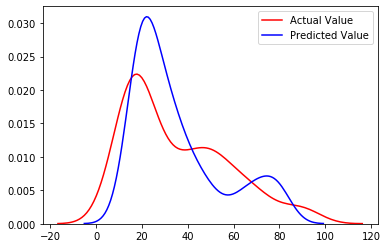

In [54]:
ax1 = sns.distplot(y_test,hist = False, color = 'r', label='Actual Value')
sns.distplot(p, hist= False, color='b', label = 'Predicted Value', ax =ax1)

In [55]:
#Save this Model as pickle file

import pickle


In [60]:

pickle.dump(lm, open('LRmodel.pkl','wb'))
